# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the csv file into pandas dataframe

In [3]:
loan = pd.read_csv("loan.csv")

#seeing the first couple of rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Checking the data shape, info and data types of columns

In [4]:
print(loan.shape)
print(loan.info())
print(loan.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


# Checking for duplicates

In [5]:
# Checking for duplicates based on id column
loan[loan.duplicated('id')]

#there are no duplicates

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [6]:
print(loan.shape)

(39717, 111)


# Dealing with null values

In [7]:
# Checking for rows & columns that have null values

print('number of empty columns:')
print(loan.isnull().all(axis = 0).sum())

print('number of empty rows:')
print(loan.isnull().all(axis = 1).sum())

number of empty columns:
54
number of empty rows:
0


In [8]:
#checking which columns that have null values

loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
#dropping columns with all values null

loan.dropna(axis=1, how = 'all', inplace = True)
loan.shape

(39717, 57)

In [10]:
loan.isnull().sum()

#so there are still some columns with null values

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [11]:
#dropping columns that have excessive null values and would be irrelevant

loan.drop(['emp_title', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1, inplace = True)

loan.shape

(39717, 52)

In [12]:
loan.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal           

### Checking columns that are single-valued

In [13]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [14]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [15]:
loan.pub_rec_bankruptcies.unique()

#this column has a couple of values but too few for proper analysis.

array([ 0.,  1.,  2., nan])

In [16]:
loan.tax_liens.unique()

array([ 0., nan])

### Dropping single-valued columns

In [17]:
loan.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies','tax_liens'],axis = 1, inplace = True)
loan.shape

(39717, 48)

In [18]:
loan.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
initial_

### The remaining columns with null values - 
1. title - The loan title provided by the borrower
2. last_pymnt_d - Last month payment was received
3. last_credit_pull_d - The most recent month LC pulled credit for this loan

### These columns make no meaningful contribution to our analysis for whether or not a person will default with a loan, therefore dropping them.

In [19]:
loan.drop(['title', 'last_pymnt_d','last_credit_pull_d'],axis = 1, inplace = True)
loan.shape

(39717, 45)

In [20]:
loan.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
initial_list_status           0
out_prnc

# Dealing with single-valued non-null columns

In [21]:
loan.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
pymnt_plan                     1
url                        39717
purpose                       14
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
initial_li

### So, single valued columns- 
- pymnt_plan
- initial_list_status
- policy_code
- application_type
- acc_now_delinq
- delinq_amnt

### Dropping these columns as single values cannot help our analysis

In [22]:
loan.drop(['pymnt_plan', 'initial_list_status', 'policy_code','application_type', 'acc_now_delinq', 'delinq_amnt'],axis = 1, inplace = True)
loan.shape

(39717, 39)

In [23]:
#checking columns we have now 

loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt'],
      dtype='object')

# Columns that do not hold relevant information:

1. id 
2. member_id 
3. funded_amnt - we have a funded amount inv column so we can remove this one.
4. url 
5. zip_code 
6. addr_state 
7. out_prncp_inv 
8. total_pymnt_inv 

# Columns that would be relevant only if the loan was approved, hence not relevant now:

1. out_prncp 
2. total_pymnt
3. total_rec_prncp 
4. total_rec_int
5. total_rec_late_fee
6. recoveries
7. collection_recovery_fee
8. last_pymnt_amnt
9. next_pymnt_d

# Dropping these columns

In [24]:
loan.drop(['id', 'member_id', 'funded_amnt', 'url', 'zip_code', 'addr_state', 'out_prncp_inv', 'total_pymnt_inv', 'revol_bal', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt'] ,axis = 1, inplace = True)

loan.shape

(39717, 22)

In [25]:
#checking columns we have now 

loan.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

# Taking a look at individual columns

### loan_status Column

In [26]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

### Goal of analysis - identify patterns which indicate if a person is likely to default. Thus, we can do analysis only for fully paid or charged off loans i.e. not current ones.

#### Therefore, dropping records with loan_status = current.

In [27]:
loan = loan[~(loan.loan_status == 'Current')]

In [28]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [29]:
loan.shape

(38577, 22)

#### Checking the data types of each column

In [30]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  delinq_2yrs          38577 non-null 

### Handling missing values for relevant columns

In [31]:
loan.isnull().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

#### emp_length & revol_util have some missing values.

### Taking a look at emp_length & revol_util columns

In [32]:
loan.emp_length.describe()

count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object

In [33]:
loan.emp_length.dtype

dtype('O')

In [34]:
print('Mode value of emp_length:', loan.emp_length.mode())
loan.emp_length.value_counts()

Mode value of emp_length: 0    10+ years
Name: emp_length, dtype: object


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

#### Above results, show mode value has very high frequency compared to any other values. Missing value count is also very low compared to whole data set, so we can replace missing values with the mode value.

In [35]:
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)

In [36]:
loan.emp_length.isnull().sum()

0

#### As revol_util has very few null values, dropping those rows.

In [37]:
loan.dropna(axis = 0, inplace = True, subset = ['revol_util'])

In [38]:
loan.shape

(38527, 22)

#### Therefore emp_length has all non-null values now.

# Standardizing Values

In [39]:
loan.revol_util.unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [40]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [41]:
loan.int_rate.unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '7.90%', '18.64%',
       '21.28%', '12.69%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '20.89%',
       '20.30%', '23.91%', '19.03%', '23.13%', '22.74%', '22.35%',
       '22.06%', '24.11%', '6.00%', '23.52%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '19.29%', '13.99%', '18.39%', '16.89%',
       '17.99%', '20.99%', '22.85%', '19.69%', '20.62%', '20.25%',
       '21.36%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

#### These values need to be made numeric.

In [42]:
loan['revol_util'] = loan['revol_util'].apply(lambda x : float(x.split('%')[0]))

In [43]:
loan['revol_util'].dtype

dtype('float64')

In [44]:
loan.emp_length = loan.emp_length.apply(lambda x : int(x.split('+')[0]) if '+' in x else int(0) if '<' in x else int(x.split()[0]))

In [45]:
loan.emp_length.dtype

dtype('int64')

In [46]:
loan['int_rate'] = loan['int_rate'].apply(lambda x : float(x.split('%')[0]))

In [47]:
loan['int_rate'].dtype

dtype('float64')

#### Now checking the data

In [48]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Charged Off,car,1.00,0,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Fully Paid,other,20.00,0,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Fully Paid,wedding,11.20,0,Nov-04,3,9,0,28.3,12


#### Resetting the index

In [49]:
loan.reset_index(inplace = True, drop = True)

In [50]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Charged Off,car,1.00,0,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Fully Paid,other,20.00,0,Feb-96,1,10,0,21.0,37
4,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Fully Paid,wedding,11.20,0,Nov-04,3,9,0,28.3,12


#### Checking the data types of all columns

In [51]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38527 entries, 0 to 38526
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt_inv      38527 non-null  float64
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  float64
 4   installment          38527 non-null  float64
 5   grade                38527 non-null  object 
 6   sub_grade            38527 non-null  object 
 7   emp_length           38527 non-null  int64  
 8   home_ownership       38527 non-null  object 
 9   annual_inc           38527 non-null  float64
 10  verification_status  38527 non-null  object 
 11  issue_d              38527 non-null  object 
 12  loan_status          38527 non-null  object 
 13  purpose              38527 non-null  object 
 14  dti                  38527 non-null  float64
 15  delinq_2yrs          38527 non-null 

# Outlier Treatment

In [52]:
#setting theme for graphs

sns.set_style(style="darkgrid")
plt.style.use('seaborn-pastel')

#### Checking outliers for annual_inc

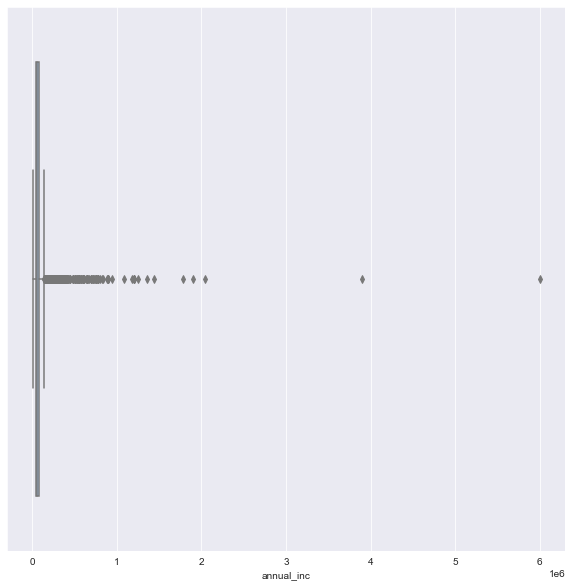

In [53]:
plt.figure(figsize = [10,10])
sns.boxplot(loan.annual_inc)
plt.show()

#### There are clearly outliers.

- To remove outliers, checking quantile info.
- The values after 95 percentile seems to be disconected from the general distribution. There is large jump in values from 0.90 to 0.95, large jump for small quantile change.
- Therefore, considering threshold for removing outliers as 0.95

In [54]:
loan.annual_inc.quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.97, 0.99])

0.25     40000.0
0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [55]:
loan = loan[loan.annual_inc <= loan.annual_inc.quantile(0.95)]

In [56]:
loan.shape

(36606, 22)

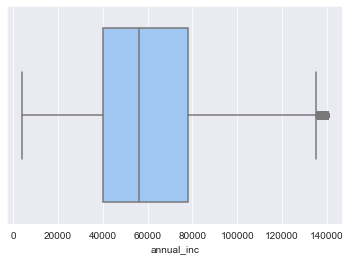

In [112]:
sns.boxplot(loan.annual_inc)
plt.show()

In [58]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36606 entries, 0 to 38526
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            36606 non-null  int64  
 1   funded_amnt_inv      36606 non-null  float64
 2   term                 36606 non-null  object 
 3   int_rate             36606 non-null  float64
 4   installment          36606 non-null  float64
 5   grade                36606 non-null  object 
 6   sub_grade            36606 non-null  object 
 7   emp_length           36606 non-null  int64  
 8   home_ownership       36606 non-null  object 
 9   annual_inc           36606 non-null  float64
 10  verification_status  36606 non-null  object 
 11  issue_d              36606 non-null  object 
 12  loan_status          36606 non-null  object 
 13  purpose              36606 non-null  object 
 14  dti                  36606 non-null  float64
 15  delinq_2yrs          36606 non-null 

#### Checking outliers for dti column

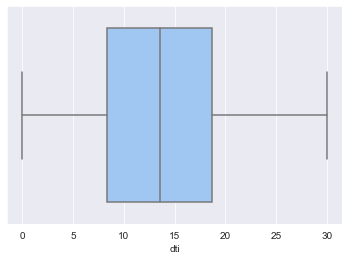

In [111]:
sns.boxplot(loan.dti)
plt.show()

#### Checking outliers for loan_amnt column

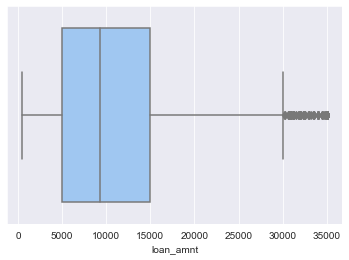

In [110]:
sns.boxplot(loan.loan_amnt)
plt.show()

 This has some outliers. Removing them.

In [109]:
loan.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

#### Checking outliers for funded_amnt_inv column

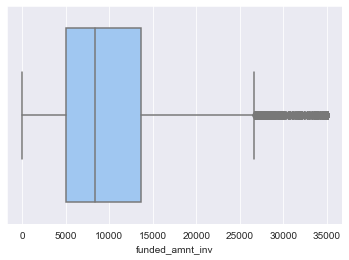

In [106]:
sns.boxplot(loan.funded_amnt_inv)
plt.show()

In [63]:
loan.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

#### There are some outliers, but as the distribution is continuous, we are not dropping these columns.

# Visualizing Categorical Data

### loan_status column

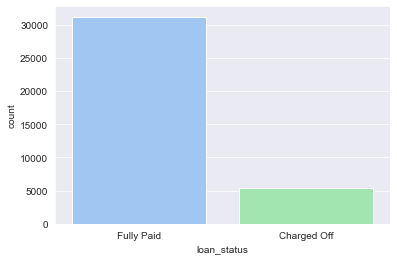

In [105]:
sns.countplot(x = 'loan_status', data = loan)
plt.show()

### grade & sub_grade columns

We have Grade & Sub_Grade variables. Converting sub_grade to integer.

In [65]:
loan.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [66]:
loan.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [67]:
loan.sub_grade = loan.sub_grade.apply(lambda x : x[-1])

In [68]:
loan.sub_grade

0        2
1        4
2        5
3        1
4        4
        ..
38521    1
38522    4
38523    1
38524    4
38526    2
Name: sub_grade, Length: 36606, dtype: object

We are only analyzing defaulter data, so we will take the subset of data with loan_status = 'Charged Off'.

#### Visualizing Grade & Subgrade Columns

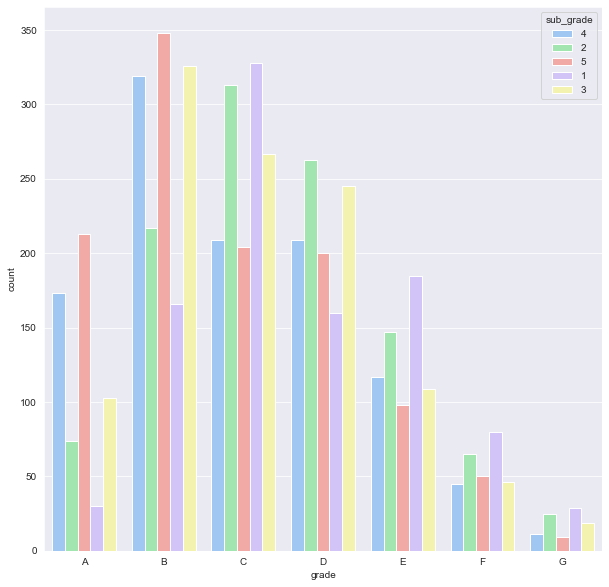

In [104]:
plt.figure(figsize = [10,10])
sns.countplot(data = loan[loan.loan_status == 'Charged Off'] , x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade')
plt.show()

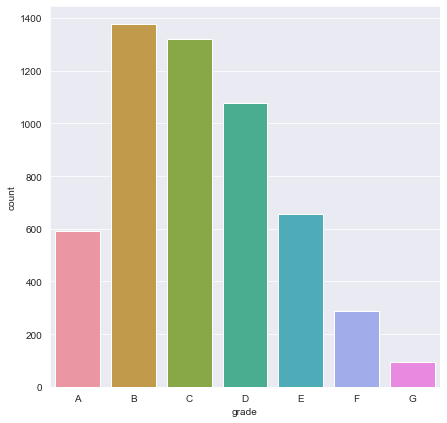

In [103]:
plt.figure(figsize = [7,7])
sns.countplot(x = 'grade', data = loan[loan.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

### home_ownership column

In [71]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [72]:
loan.home_ownership.value_counts()

RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          91
NONE            3
Name: home_ownership, dtype: int64

Replace 'NONE' with 'OTHER' as there are few 'NONE' values.

In [73]:
loan.home_ownership.replace(to_replace = 'NONE', value = 'OTHER', inplace = True)

In [74]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

#### Visualizing home_ownership column

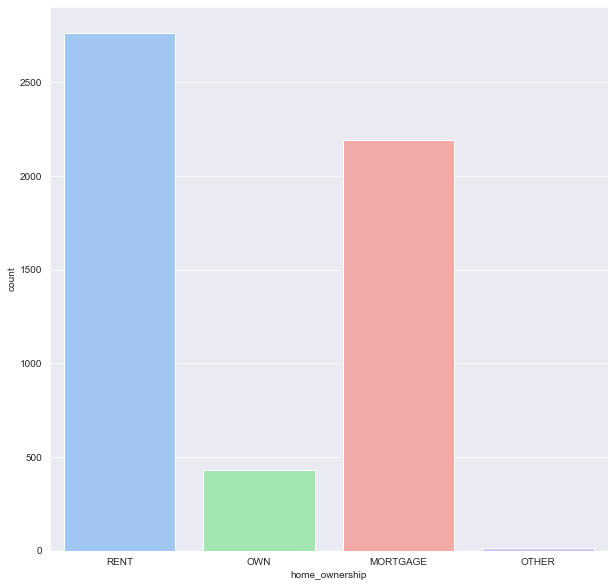

In [102]:
plt.figure(figsize = [10,10])
sns.countplot(x = 'home_ownership', data = loan[loan.loan_status == 'Charged Off'], order = ['RENT', 'OWN', 'MORTGAGE', 'OTHER'])
plt.show()

### purpose column

In [76]:
loan.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

#### Visualizing purpose column

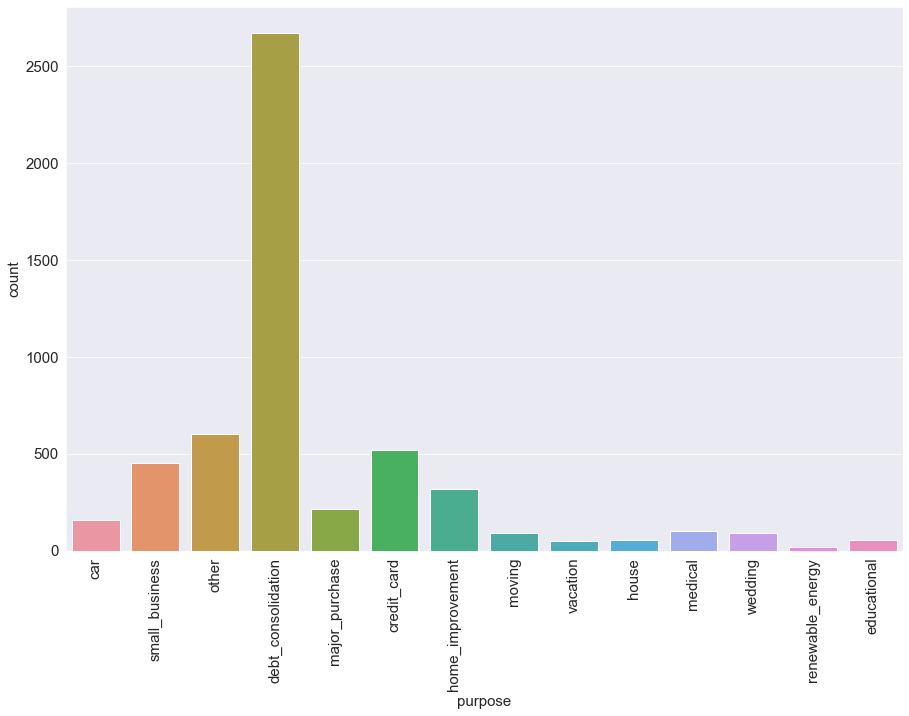

In [101]:
plt.figure(figsize = [15,10])
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(xlabel= 'purpose', fontsize = 15)
plt.ylabel(ylabel= 'count', fontsize = 15)
sns.countplot(x = 'purpose', data = loan[loan.loan_status == 'Charged Off'])
plt.show()

### Employment Length column

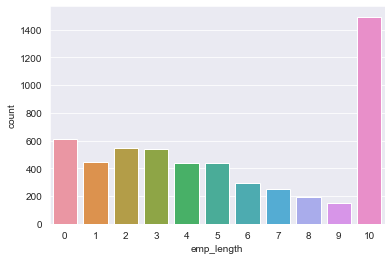

In [224]:
sns.countplot(x = 'emp_length', data = loan[loan.loan_status == 'Charged Off'])
plt.show()

### Creating bins for some numerical values to be considered as categorical

In [78]:
loan.int_rate.describe()

count    36606.000000
mean        11.883216
std          3.666065
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [79]:
loan.open_acc.describe()

count    36606.000000
mean         9.173086
std          4.351894
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [80]:
loan.revol_util.describe()

count    36606.000000
mean        48.659741
std         28.282836
min          0.000000
25%         25.300000
50%         49.000000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64

In [81]:
loan.total_acc.describe()

count    36606.000000
mean        21.655630
std         11.229937
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

In [82]:
loan.annual_inc.describe()

count     36606.000000
mean      60890.563839
std       27741.337421
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      140004.000000
Name: annual_inc, dtype: float64

In [83]:
#creating bins for int_rate, revol_util, total_acc, annual_inc

loan['int_rate_group'] = pd.cut(loan.int_rate, bins = 5, labels = ['5% - 9%', '9% - 13%', '13% - 17%', '17% - 21%', '21% - 24%'] )
loan['open_acc_group'] = pd.cut(loan.open_acc, bins = 5, labels = ['2-10','10-19', '19-27','27 - 36', '36-44'] )
loan['revol_util_group'] = pd.cut(loan.revol_util, bins = 5, labels = [ '0-20', '20-40', '40-60', '60-80' , '80-100'])
loan['total_acc_group'] = pd.cut(loan.total_acc , bins = 5, labels = ['2-20','20 - 37','37-55','55-74','74-90'])
loan['annual_inc_group'] = pd.cut(loan.annual_inc , bins = 5, labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'] )

In [84]:
#seeing new bin columns

loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_group,open_acc_group,revol_util_group,total_acc_group,annual_inc_group
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.7,9,9% - 13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,5,3,0,9.4,4,13% - 17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,2,0,98.5,10,13% - 17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,1,10,0,21.0,37,13% - 17%,2-10,20-40,20 - 37,31k-58k
4,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,3,9,0,28.3,12,5% - 9%,2-10,20-40,2-20,31k-58k


### Visualizing columns with the new bins created

#### Visualizing interest rate

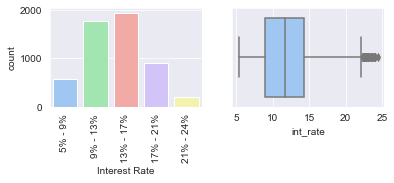

In [218]:
plt.subplot(221)
sns.countplot(x='int_rate_group', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.xticks(rotation = 90)
plt.subplot(222)
sns.boxplot(loan.int_rate)
plt.show()

#### Visualizing open acc

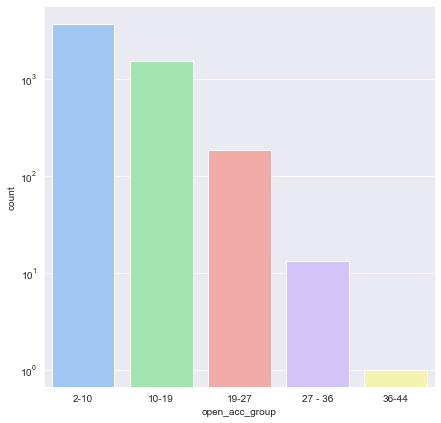

In [100]:
fig, ax = plt.subplots(figsize = [7,7])
#setting y scale as log for more readable graph
ax.set_yscale('log')
sns.countplot(x = 'open_acc_group', data = loan[loan.loan_status == 'Charged Off'])
plt.show()

#### Visualizing Revolving line utilization rate

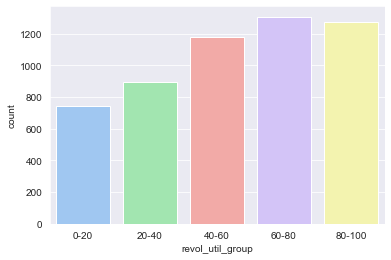

In [114]:
sns.countplot(x = 'revol_util_group', data = loan[loan.loan_status == 'Charged Off'])
plt.show()

#### Visualizing total number of credit lines

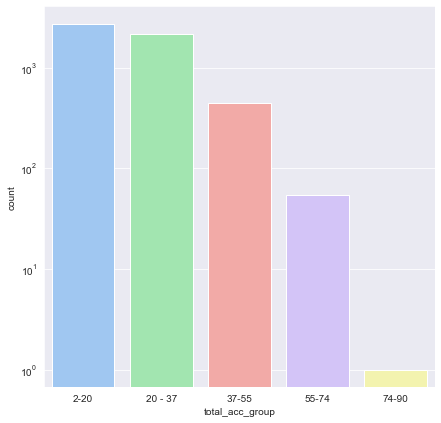

In [119]:
fig, ax = plt.subplots(figsize = [7,7])
sns.countplot(x = 'total_acc_group', data = loan[loan.loan_status == 'Charged Off'])
#setting y scale as log for more readable graph
ax.set_yscale('log')
plt.show()

#### Visualizing annual income

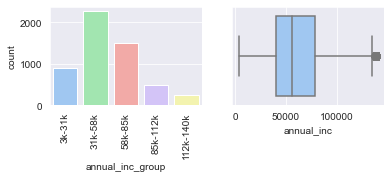

In [220]:
plt.subplot(221)
sns.countplot(x = 'annual_inc_group', data = loan[loan.loan_status == 'Charged Off'])
plt.xticks(rotation = 90)
plt.subplot(222)
sns.boxplot(loan.annual_inc)
plt.show()

## Visualizing term

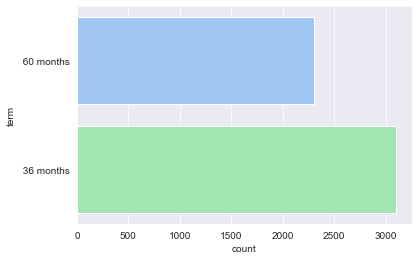

In [125]:
sns.countplot(y = 'term', data = loan[loan.loan_status == 'Charged Off'])
plt.show()

## Visualizing verification status

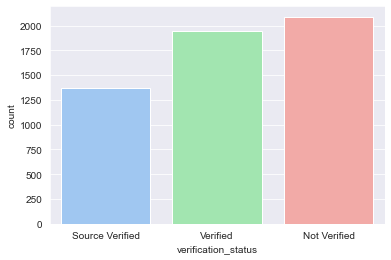

In [127]:
sns.countplot(x = 'verification_status', data = loan[loan.loan_status == 'Charged Off'])
plt.show()

## Visualizing inquiries in past 6 months

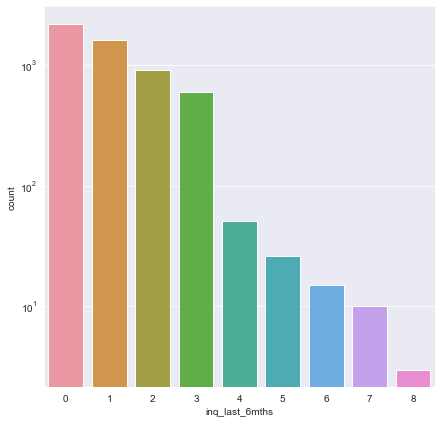

In [135]:
fig, ax = plt.subplots(figsize = [7,7])
#setting y scale as log for more readable graph
ax.set_yscale('log')
sns.countplot(x = 'inq_last_6mths', data = loan[loan.loan_status == 'Charged Off'])
plt.show()

## Visualizing Number of derogatory public records

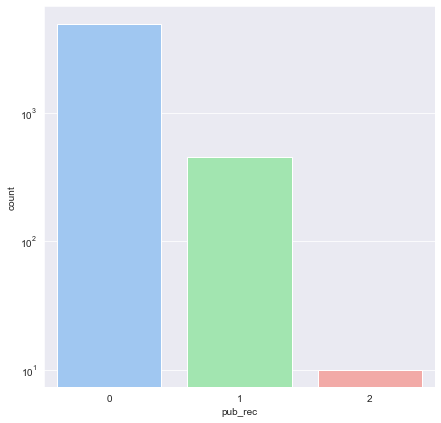

In [139]:
fig, ax = plt.subplots(figsize = [7,7])
#setting y scale as log for more readable graph
ax.set_yscale('log')
sns.countplot(x = 'pub_rec', data = loan[loan.loan_status == 'Charged Off'])
plt.show()

## Looking at issue date

Extracting month and year from issue date

In [146]:
loan['issue_month'] = loan['issue_d'].apply(lambda x : x.split('-')[0])
loan['issue_year'] = loan['issue_d'].apply(lambda x : '20' + x.split('-')[1])

In [149]:
#checking extracted month and year values

loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,int_rate_group,open_acc_group,revol_util_group,total_acc_group,annual_inc_group,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,0,83.7,9,9% - 13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,0,9.4,4,13% - 17%,2-10,0-20,2-20,3k-31k,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,0,98.5,10,13% - 17%,2-10,80-100,2-20,3k-31k,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,0,21.0,37,13% - 17%,2-10,20-40,20 - 37,31k-58k,Dec,2011
4,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,0,28.3,12,5% - 9%,2-10,20-40,2-20,31k-58k,Dec,2011


#### Visualizing issue month and year

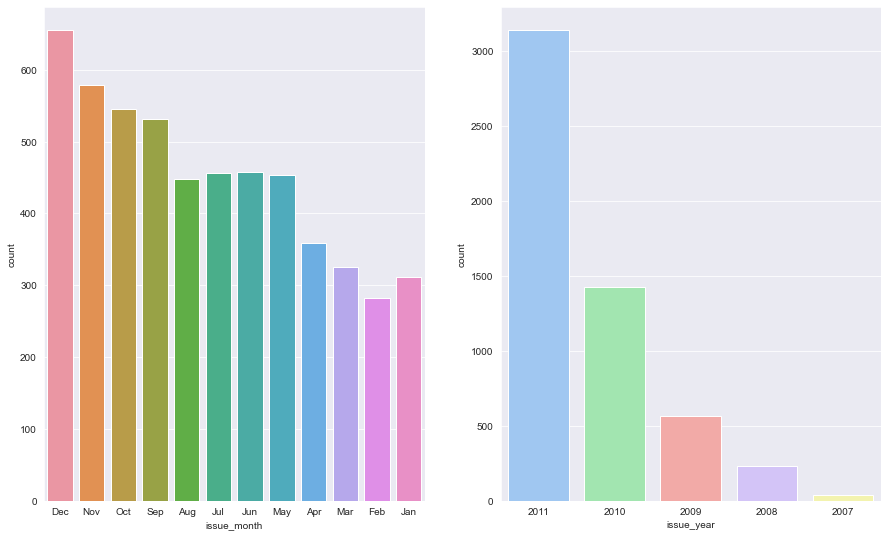

In [157]:
plt.figure(figsize=(15,20))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan[loan['loan_status']=='Charged Off'])
plt.subplot(222)
# ax.set_yscale('log')
sns.countplot(x='issue_year', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

## Maximum defaults occured for loans issued in the month of December of the year 2011.

## Creating bins for some more columns

In [159]:
loan.installment.describe()

count    36606.000000
mean       312.088564
std        199.238384
min         15.690000
25%        163.110000
50%        270.845000
75%        408.902500
max       1305.190000
Name: installment, dtype: float64

In [160]:
loan.funded_amnt_inv.describe()

count    36606.000000
mean      9902.311039
std       6730.696329
min          0.000000
25%       4988.276705
50%       8396.342174
75%      13649.999283
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [161]:
loan.loan_amnt.describe()

count    36606.000000
mean     10690.058324
std       7048.412687
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [162]:
loan.dti.describe()

count    36606.000000
mean        13.450146
std          6.660418
min          0.000000
25%          8.350000
50%         13.580000
75%         18.720000
max         29.990000
Name: dti, dtype: float64

In [164]:
# creating bins

loan['installment_group'] = pd.cut(loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan['funded_amnt_inv_group'] = pd.cut(loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['loan_amnt_group'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['dti_group'] = pd.cut(loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [165]:
#checking new columns

loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc_group,revol_util_group,total_acc_group,annual_inc_group,issue_month,issue_year,installment_group,funded_amnt_inv_group,loan_amnt_group,dti_group
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,2-10,80-100,2-20,3k-31k,Dec,2011,145-274,0-5k,0-5k,24-30
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,2-10,0-20,2-20,3k-31k,Dec,2011,14-145,0-5k,0-5k,0-6
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2-10,80-100,2-20,3k-31k,Dec,2011,14-145,0-5k,0-5k,6-12
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,2-10,20-40,20 - 37,31k-58k,Dec,2011,274-403,5k-10k,5k-10k,18-24
4,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,2-10,20-40,2-20,31k-58k,Dec,2011,145-274,0-5k,0-5k,6-12


## Visualizing funded_amnt_inv

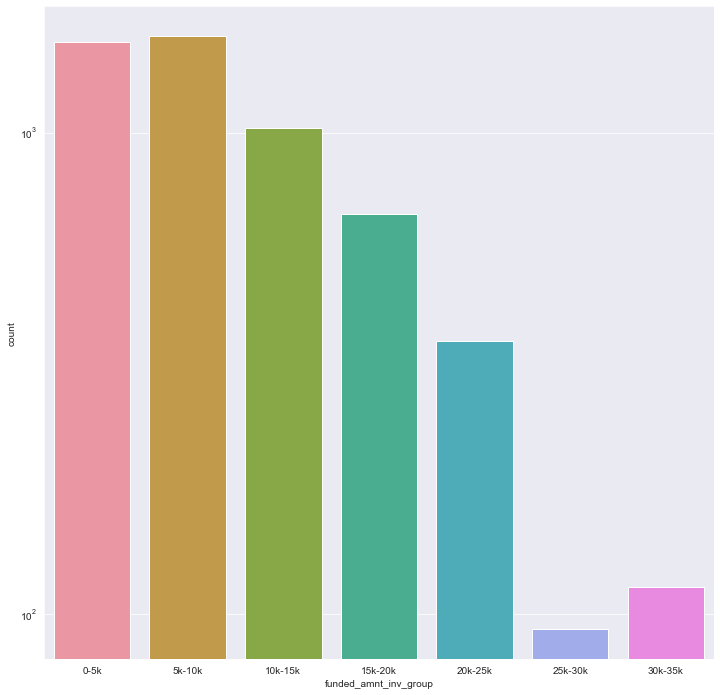

In [167]:
fig, ax = plt.subplots(figsize = (12,12))
ax.set_yscale('log')
sns.countplot(x = 'funded_amnt_inv_group', data = loan[loan.loan_status == 'Charged Off'])
plt.show()

## Visualizing loan_amnt

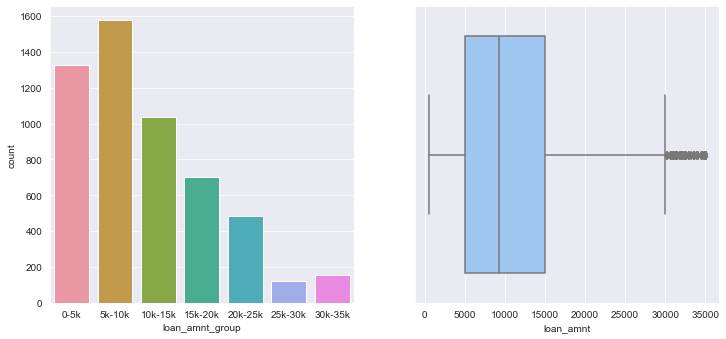

In [215]:
fig, ax = plt.subplots(figsize = (12,12))
plt.subplot(221)
sns.countplot(x = 'loan_amnt_group', data = loan[loan.loan_status == 'Charged Off'])
plt.subplot(222)
sns.boxplot(loan.loan_amnt)
plt.show()

## Observation - 

Most of the Loan amounts are in range of 5000 - 15000.

## Visualizing dti

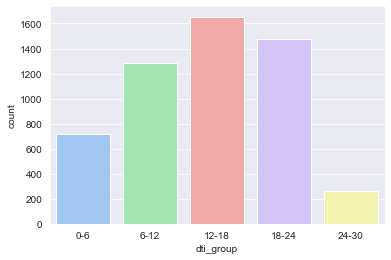

In [175]:
sns.countplot(x = 'dti_group', data = loan[loan.loan_status == 'Charged Off'])
plt.show()

## Visualizing installment

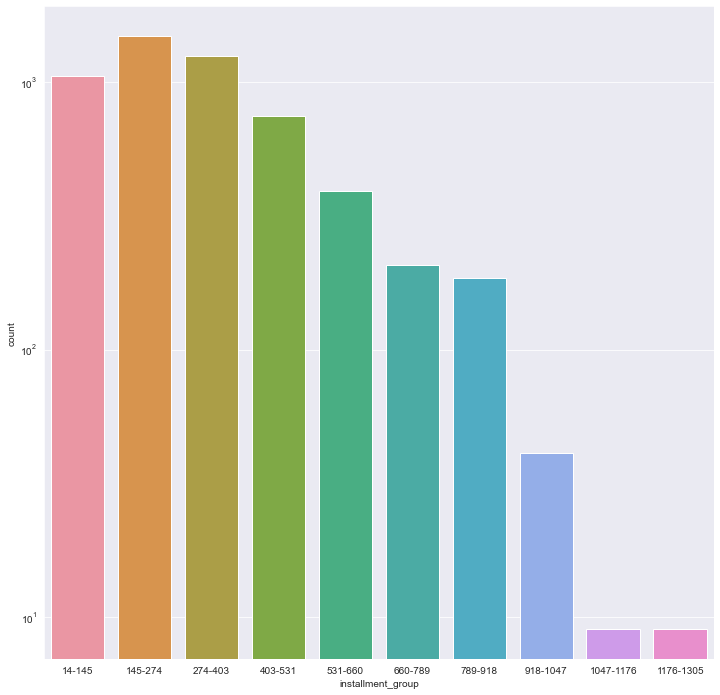

In [181]:
fig, ax = plt.subplots(figsize = (12,12))
ax.set_yscale('log')
sns.countplot(x = 'installment_group', data = loan[loan.loan_status == 'Charged Off'])
plt.show()

# Observations so far

#### We have analysed each variable for charged off loans. Thus, there is higher probability for defaulting in case:

- LC assigned loan grade 5 with sublevel 5
- Home ownership is 'RENT'
- Purpose of loan is debt consolation i.e. to clear other debts
- Interest rate is 13% - 17%
- The number of open credit lines in the borrower's credit file is 2-10
- Revolving line utilization rate is 60-80
- Total number of credit lines is 2-20
- Annual income is in the range of 31k - 58k
- Term i.e. the number of payments on the loan of loan is 36 months
- Income Verification status is 'Not Verified'
- Number of inquiries in last 6 months is 0
- Number of derogatory public records is 0
- The total amount committed by investors for that loan at that point in time was 5k - 10k
- The listed amount of the loan applied for by the borrower was 5k - 10k
- dti i.e. A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income was 12-18
- Installment i.e. The monthly payment owed by the borrower was 145 - 274


#### Loans issued in the month of December 2011 had a very high defaulter rate, maybe there was a recession or market crash at the time.

# A heatmap to see correlated columns for further analysis.

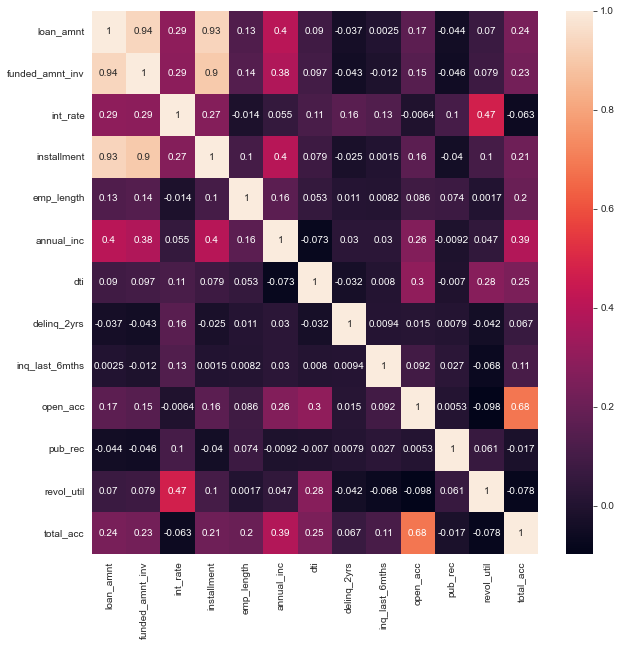

In [180]:
plt.figure(figsize = [10,10])
sns.heatmap(loan.corr(), annot=True)
plt.show()

## Based on this we analyze certain pairs of columns for more insights.

## Annual Income with other columns

#### Annual Income vs. Loan Purpose

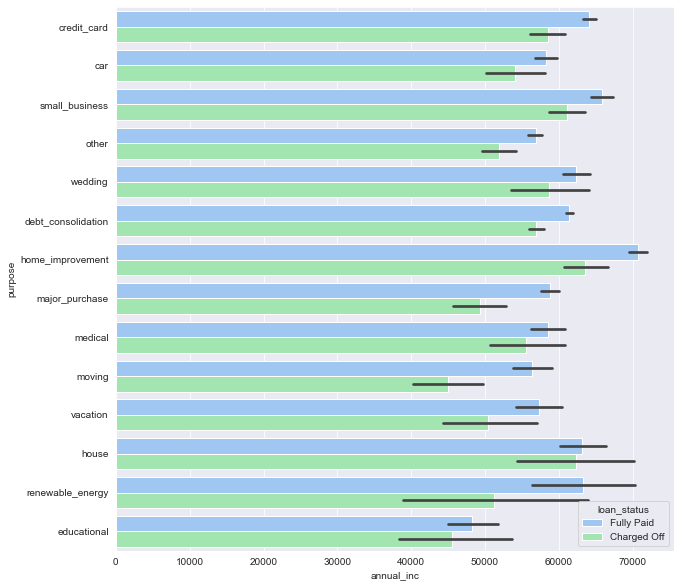

In [184]:
plt.figure(figsize = [10,10])
sns.barplot(data = loan , x = 'annual_inc', y = 'purpose', hue = 'loan_status')
plt.show()

#### Observation - 
Even though loans defaulted are highest in number for 'debt consolation' purpose, when we take look at annual income, the highest annual income defaulters apply for loans for 'home improvement', 'renewable energy', 'small business', 'wedding'.

#### Annual Income vs. Home Ownership

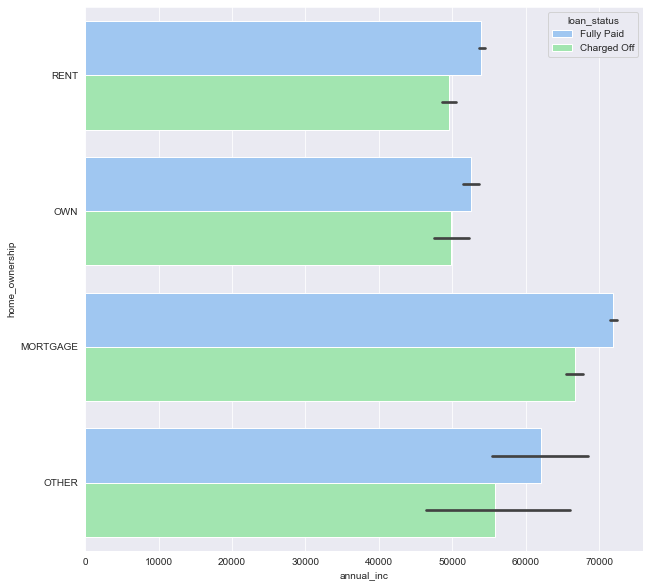

In [186]:
plt.figure(figsize = [10,10])
sns.barplot(data = loan , x = 'annual_inc', y = 'home_ownership', hue = 'loan_status')
plt.show()

#### Observation - 
Even though loans defaulted are highest in number for 'rent' purpose, when we take look at annual income, the highest annual income defaulters are on 'mortgage'

#### Annual Income vs. Loan Amount

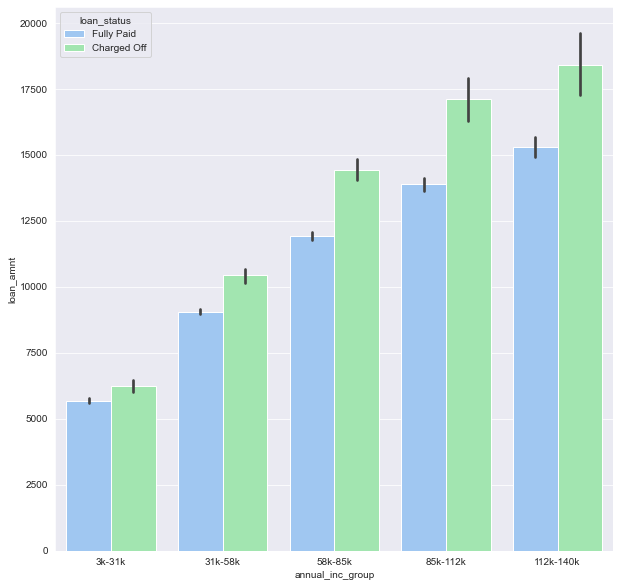

In [190]:
plt.figure(figsize = [10,10])
sns.barplot(data = loan , x = 'annual_inc_group', y = 'loan_amnt', hue = 'loan_status')
plt.show()

#### Observation - 
Over all the income groups, the defaulters are ones who have applied for larger loans.

#### Annual Income vs. Installment

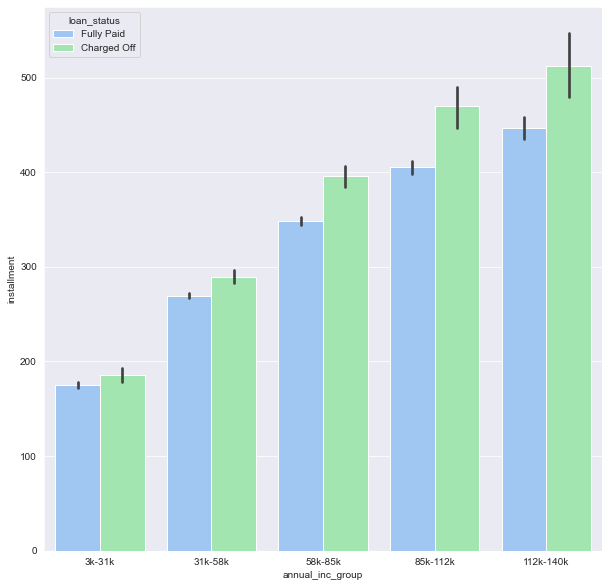

In [191]:
plt.figure(figsize = [10,10])
sns.barplot(data = loan , x = 'annual_inc_group', y = 'installment', hue = 'loan_status')
plt.show()

#### Observation - 
As expected over all income groups the defaulters are ones with higher installments & also the installment amount goes up with increaing annual income.

#### Annual Income vs. Interest Rate

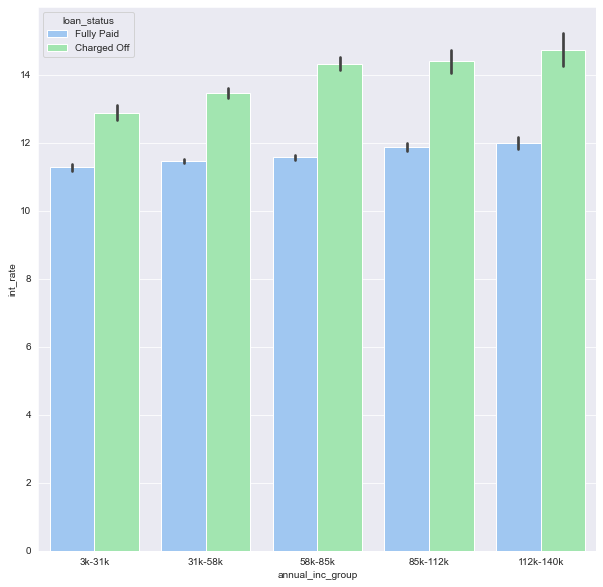

In [194]:
plt.figure(figsize = [10,10])
sns.barplot(data = loan , x = 'annual_inc_group', y = 'int_rate', hue = 'loan_status')
plt.show()

#### Observation - 
As expected over all income groups the defaulters are ones with higher interest rates & also the interest rates goes up with increaing annual income.

## Loan Amount with other columns

#### Loan Amount vs Interest Rate

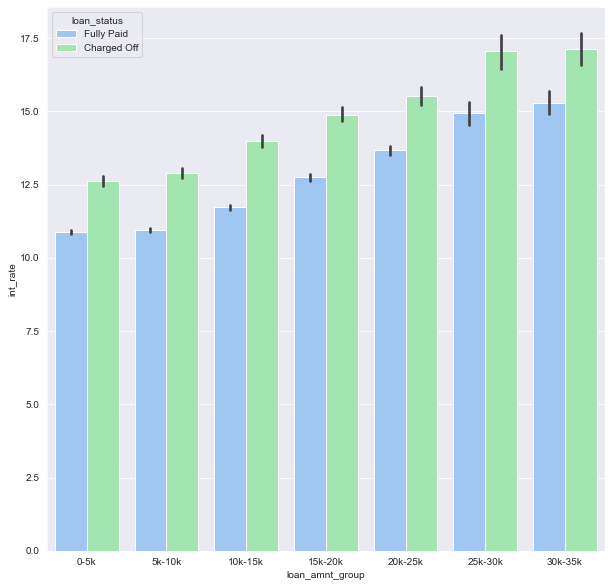

In [195]:
plt.figure(figsize = [10,10])
sns.barplot(data = loan , x = 'loan_amnt_group', y = 'int_rate', hue = 'loan_status')
plt.show()

#### Observation - 
Higher loan amounts mean higher interest rates and within an interest rate group the defaulters are ones with the higher interest rate.

#### Loan Amount vs Loan Purpose

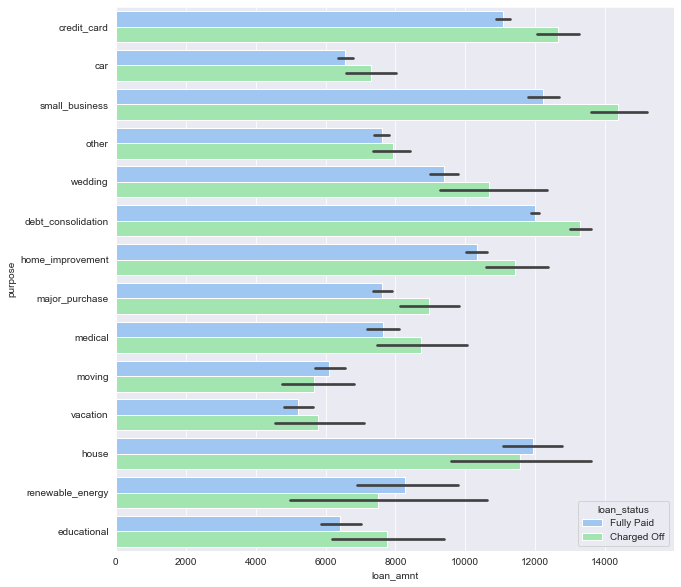

In [197]:
plt.figure(figsize = [10,10])
sns.barplot(data = loan , x = 'loan_amnt', y = 'purpose', hue = 'loan_status')
plt.show()

#### Observation - 
Highest loan amounts are for small business, debt consolidation & houses. The defaulters all have higher loan amounts compared to the poeple who paid off their loans across all categories except moving, house & renewable energy.

#### Loan Amount vs House Ownership

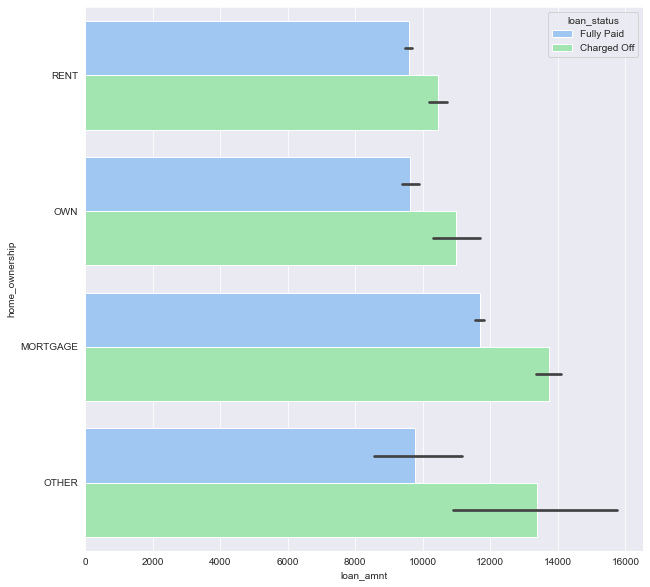

In [198]:
plt.figure(figsize = [10,10])
sns.barplot(data = loan , x = 'loan_amnt', y = 'home_ownership', hue = 'loan_status')
plt.show()

#### Observation - 
Highest loan amounts are for small business, debt consolidation & houses. The defaulters all have higher loan amounts compared to the poeple who paid off their loans across all categories except moving, house & renewable energy.

#### Loan Amount vs Issue Month & Year

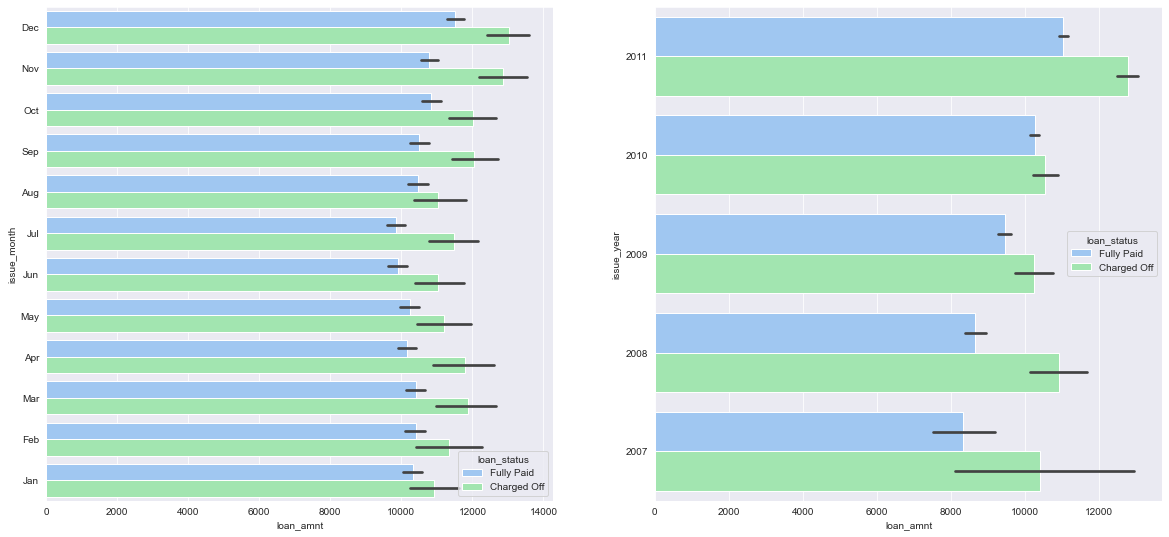

In [203]:
plt.figure(figsize = [20,20])
plt.subplot(221)
sns.barplot(data = loan , x = 'loan_amnt', y = 'issue_month', hue = 'loan_status')
plt.subplot(222)
sns.barplot(data = loan , x = 'loan_amnt', y = 'issue_year', hue = 'loan_status')
plt.show()

#### Loan Amount vs Grade

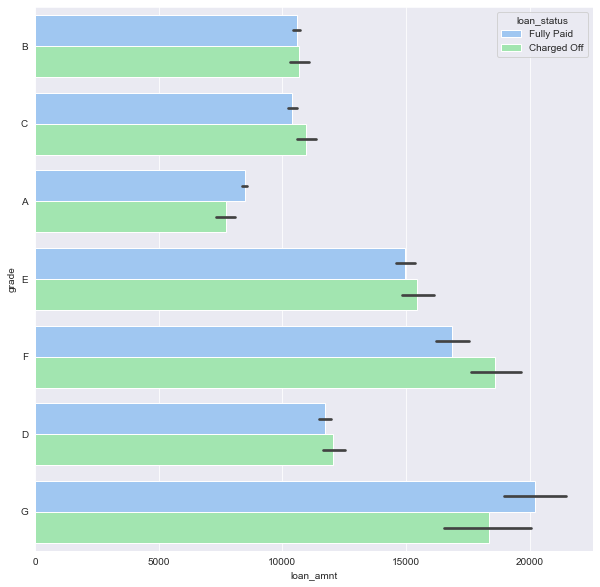

In [205]:
plt.figure(figsize = [10,10])
sns.barplot(data = loan , x = 'loan_amnt', y = 'grade', hue = 'loan_status')
plt.show()

#### Observation - 
Even though highest likely defaulters were from grade 'B', in general those loans are lower loan amounts.

#### Loan Amount vs Employee Length (working history)

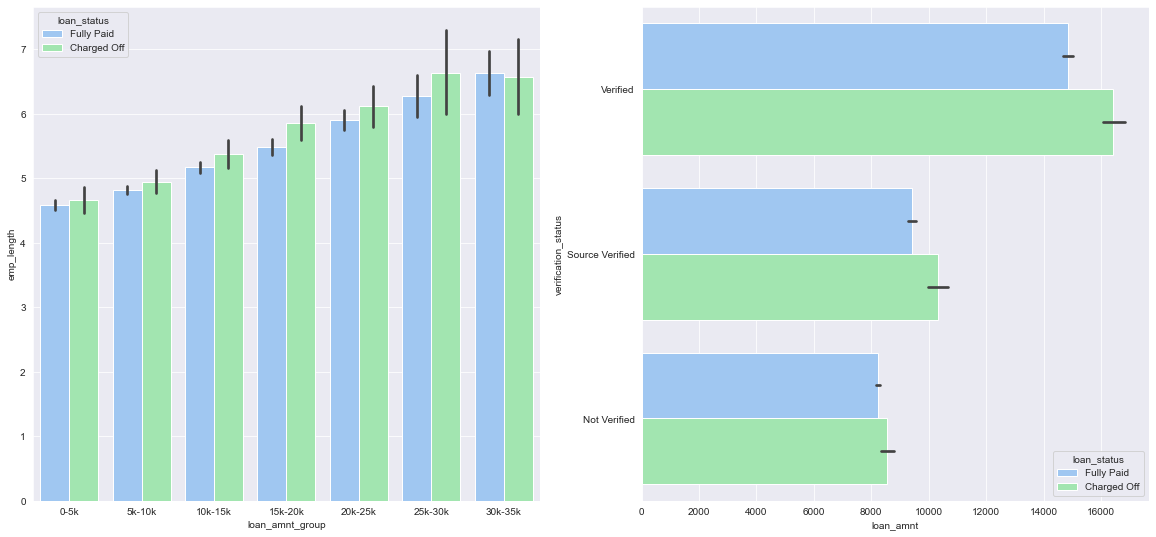

In [208]:
plt.figure(figsize = [20,20])
plt.subplot(221)
sns.barplot(data = loan , x = 'loan_amnt_group', y = 'emp_length', hue = 'loan_status')
plt.subplot(222)
sns.barplot(data = loan , x = 'loan_amnt', y = 'verification_status', hue = 'loan_status')
plt.show()

#### Observation - 

- Employees who've been working for longer recieve higher loan amounts.
- Higher loan amounts are verified.
- Thus, perhaps longer working history leads to verified loans

### Loan Amount vs Term

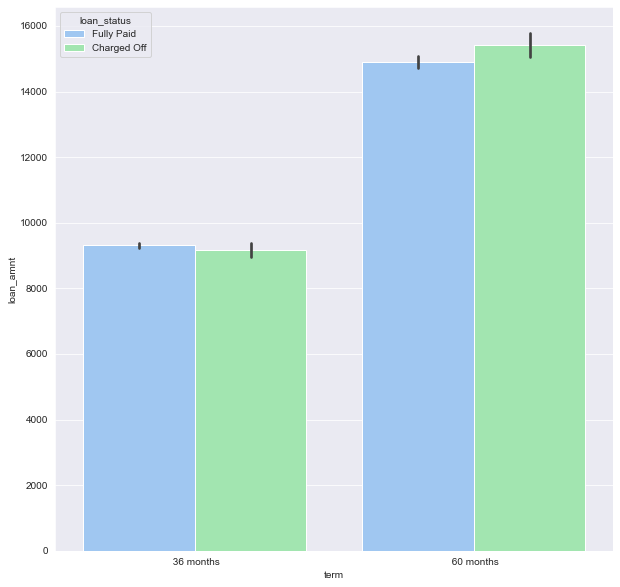

In [213]:
plt.figure(figsize = [10,10])
sns.barplot(data = loan , x = 'term', y = 'loan_amnt', hue = 'loan_status')
plt.show()

#### Observation - 

- As expected higher loan amounts have higher terms.

## Grade vs Interest Rate

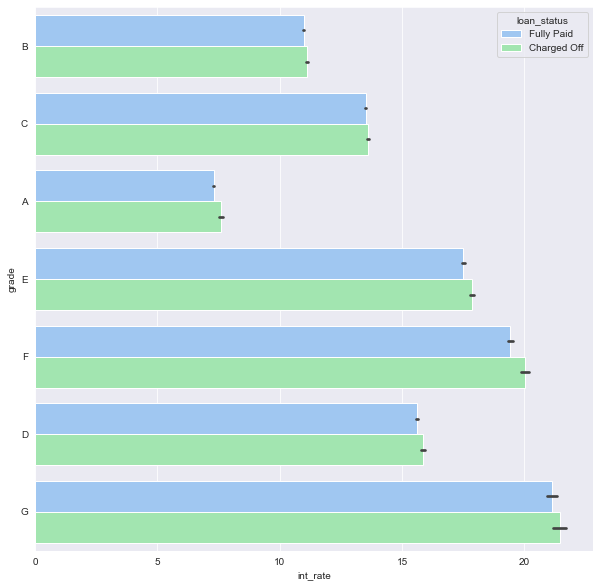

In [209]:
plt.figure(figsize = [10,10])
sns.barplot(data = loan , x = 'int_rate', y = 'grade', hue = 'loan_status')
plt.show()

## Term vs Interest Rate

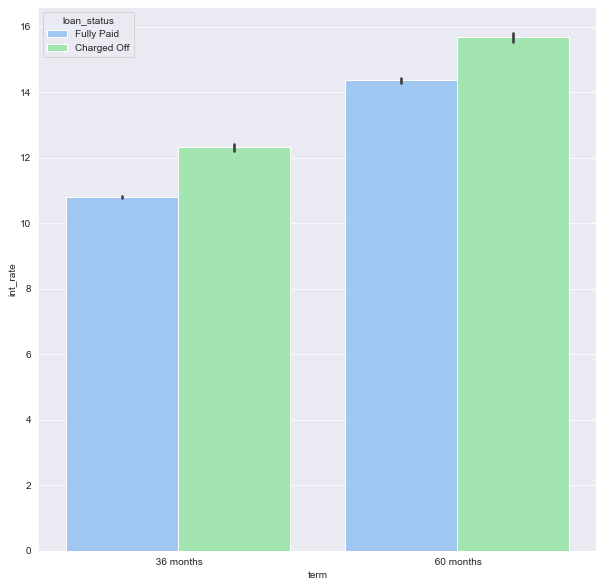

In [227]:
plt.figure(figsize = [10,10])
sns.barplot(data = loan , x = 'term', y = 'int_rate', hue = 'loan_status')
plt.show()

## Purpose vs Interest Rate

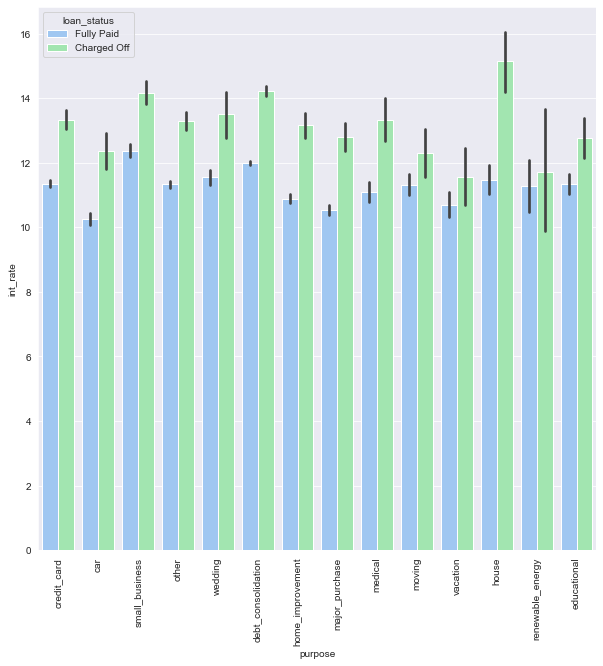

In [229]:
plt.figure(figsize = [10,10])
sns.barplot(data = loan , x = 'purpose', y = 'int_rate', hue = 'loan_status')
plt.xticks(rotation = 90)
plt.show()

## DTI vs Interest Rate

# Further Observations based on the above analysis.

## To sum up some of the above observations:

- Even though loans defaulted are highest in number for 'debt consolation' purpose, when we take look at annual income, the highest annual income defaulters apply for loans for 'home improvement', 'renewable energy', 'small business', 'wedding'.
- Even though loans defaulted are highest in number for 'rent' purpose, when we take look at annual income, the highest annual income defaulters are on 'mortgage'.
- Higher annual income means higher loan amounts which consequently also means higher installments.
- As expected over all income groups the defaulters are ones with higher installments & also the installment amount goes up with increaing annual income.
- Over all income groups the defaulters are ones with higher interest rates & also the interest rates goes up with increaing annual income.
- Over all the income groups, the defaulters are ones who have applied for larger loans.
- Higher loan amounts mean higher interest rates and within an interest rate group the defaulters are ones with the higher interest rate.
- Highest loan amounts are for small business, debt consolidation & houses. The defaulters all have higher loan amounts compared to the poeple who paid off their loans across all categories except moving, house & renewable energy.
- Even though highest likely defaulters were from grade 'B', in general those loans are lower loan amounts.
- Employees who've been working for longer recieve higher loan amounts.
- Higher loan amounts are verified.
- Thus, perhaps longer working history leads to verified loans.
- As expected higher loan amounts have higher terms.


## The probability for defaulting is more when:

- Those taking loans for purpose 'home improvement' & have income of 60k - 70k.
- Those taking loans whose home ownership is 'mortgage' & have income of 60k - 70k.
- Those whose home ownership is 'MORTGAGE and have loan of 13-14k.
- Those whose grade is F and loan amount is between 15k-20k.
- Those whose loan is verified and loan amount is above 16k.
- Those whose grade is G and interest rate above 20%.